In [1]:
# @title Install `af_analysis` library {"display-mode":"form"}
%%bash
git clone https://github.com/samuelmurail/af_analysis;
cd af_analysis;
pip install .;
pip install ipympl;

Processing /content/af_analysis
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for af-analysis: filename=af_analysis-0.1.1-py3-none-any.whl size=46505 sha256=608987af161a48e22e0fff39657a02ce2749bbe77e8a27cbaa9d1e9557d0290d
  Stored in directory: /tmp/pip-ephem-wheel-cache-gt883s7z/wheels/73/69/e2/de58c79c15e3861b8addb15eaeb9bae0ca24b457aec0707d82
Successfully built af-analysis
  Attempting uninstall: af-analysis
    Found existing installation: af-analysis 0.1.1
    Uninstalling af-analysis-0.1.1:
      Successfully uninstalled af-analysis-0.1.1


fatal: destination path 'af_analysis' already exists and is not an empty directory.


In [2]:
# @title notebook configuration
import logging
from google.colab import output

output.enable_custom_widget_manager()

logging.basicConfig(filename='app.log',
                    level=logging.DEBUG,
                    force=True, # Resets any previous configuration
                    )

%matplotlib ipympl

# Basic Example

## Importing packages

You first need to import the `af_analysis` package:

In [3]:
import af_analysis
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Alphafold Data

To import your data, create a `af_analysis.Data` object by giving the path of Alphafold directorie:

In [4]:
DATA_PATH = 'af_analysis/src/af_analysis/test/inputs/beta_amyloid_dimer_cf_1.5.5/'
my_data = af_analysis.Data(DATA_PATH)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

You now have access to a pandas `DataFrame` containing all model informations:

In [5]:
my_data.df.head(2)

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,format,pdb,relaxed_pdb,json
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,colabfold_1.5,af_analysis/src/af_analysis/test/inputs/beta_a...,None,af_analysis/src/af_analysis/test/inputs/beta_a...
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,colabfold_1.5,af_analysis/src/af_analysis/test/inputs/beta_a...,None,af_analysis/src/af_analysis/test/inputs/beta_a...


For each query of the directorie, the chains IDs and chain length will be store in `chains` and `chain_length` properties of the `Data` object:

In [6]:
my_data.chain_length

{'beta_amyloid_dimer_d2fa3_0': [42, 42]}

In [7]:
my_data.chains

{'beta_amyloid_dimer_d2fa3_0': ['A', 'B']}

## Analysing scores

You can then sort or extract your models based on the score you are interrested in:

* pLDDT
* pTM
* ipTM
* ranking_confidence

Here I am extracting the best `ipTM` model index:

In [8]:
best_ipTM_index = my_data.df['ipTM'].idxmax()
worst_ipTM_index = my_data.df['ipTM'].idxmin()

You can get access to all its caracteristics:

In [9]:
my_data.df.iloc[best_ipTM_index]

,14
query,beta_amyloid_dimer_d2fa3_0
seed,2
model,5
weight,alphafold2_multimer_v3
recycle,9
pLDDT,68.3
pTM,0.628
ipTM,0.604
ranking_confidence,0.6088
format,colabfold_1.5


### Plots

You can plot the the pLDDT for one model:

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

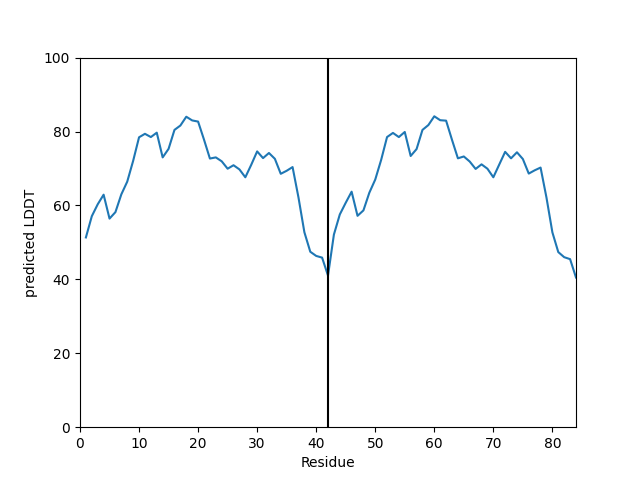

In [10]:
my_data.plot_plddt([best_ipTM_index])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

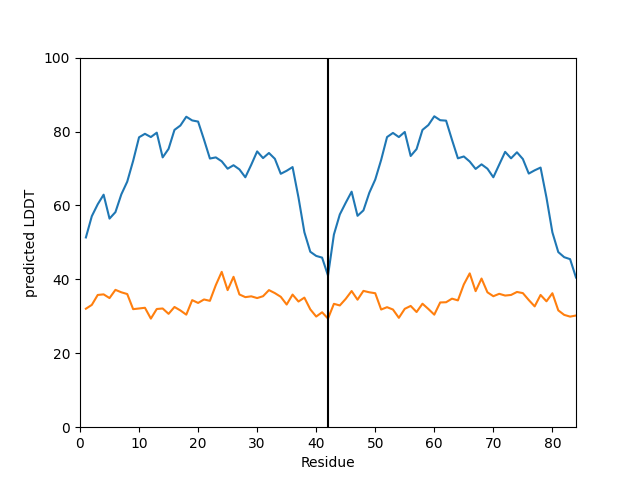

In [11]:
my_data.plot_plddt([best_ipTM_index, worst_ipTM_index])

And also have a look on the Predicted Aligned Error (PAE) matrix:

(<Figure size 640x480 with 2 Axes>, <Axes: >)

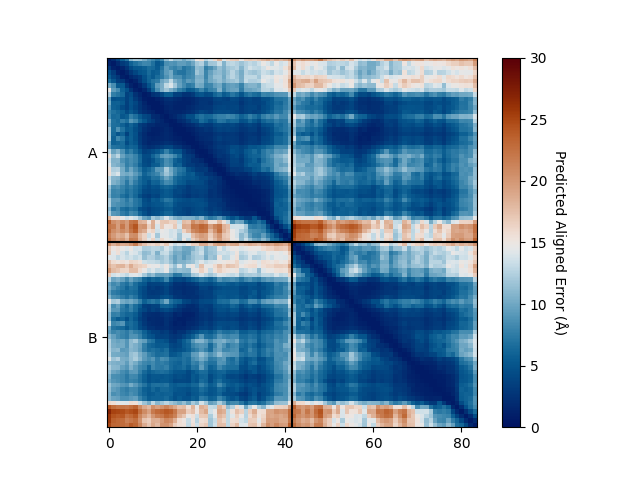

In [12]:
my_data.plot_pae(best_ipTM_index)

IntSlider(value=1, description='model:', max=40, min=1)

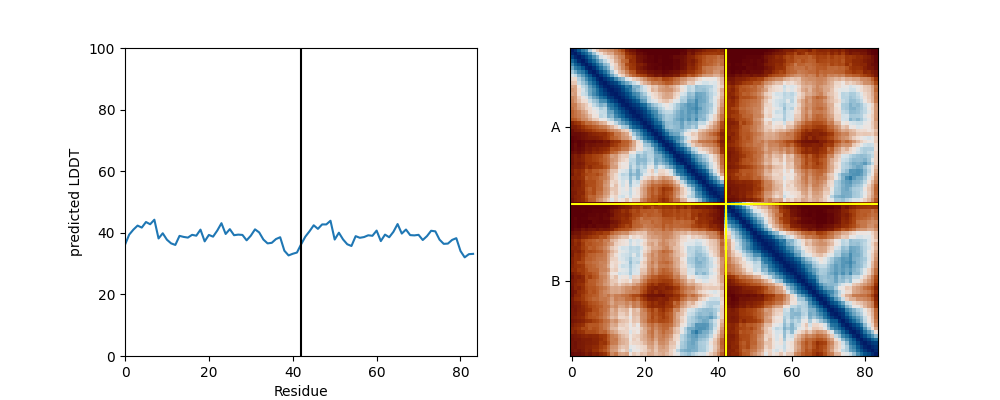

HTML(value='')

In [13]:
from af_analysis import plot

plot.show_info(my_data)

### show 3D structure

The 3D structure can be represented using the `nglview` library:

```python
view = my_data.show_3d(best_ipTM_index)
view
```


Unfortunatly this feature is not working in Google Colab notebook

## Computing scores

Additional scores can be computed as the pdockq and pdockq2:

In [14]:
from af_analysis import analysis

#compute_pdockq
analysis.pdockq(my_data)
#compute_pdockq2
analysis.pdockq2(my_data)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Some additional scores have been compute to caracterise the protein-peptide structures:

In [15]:
from af_analysis import docking

#extract_pae_pep
docking.pae_pep(my_data)
#compute_pdockq2_lig
docking.pdockq2_lig(my_data)
#compute_LIS_pep
docking.LIS_pep(my_data)
#extract_plddt_pep
docking.plddt_pep(my_data)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

All computed scores are now stored in the pandas dataframe as new columns :

In [16]:
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'format', 'pdb', 'relaxed_pdb', 'json', 'pdockq',
       'pdockq2_A', 'pdockq2_B', 'PAE_pep_rec', 'PAE_rec_pep', 'pdockq2_lig',
       'LIS', 'LIS_rec_pep', 'LIS_pep_rec', 'plddt_pep'],
      dtype='object')

## Clustering

Eventually the obtain models can be clustered to have a better idea oh AlphaFold model diversity. Here we are using
a thresold of 4 Å with hierarchical clustering:

/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/base.py:728: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

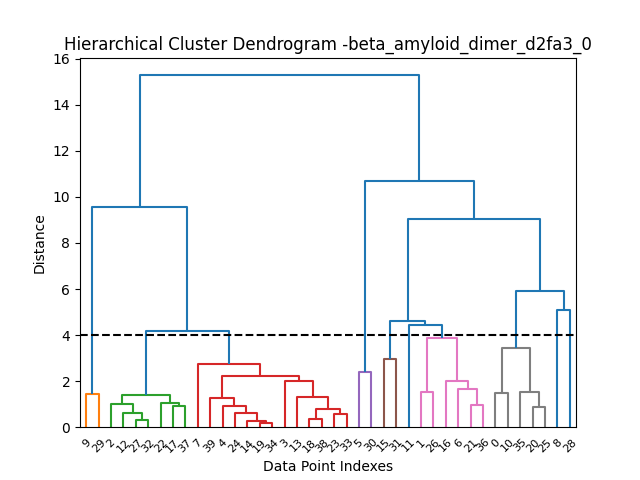

In [17]:
from af_analysis import clustering

clustering.hierarchical(my_data.df, threshold=4)

Alternatively, the RMSD can be normalized and scaled using Bjorn Wallner scaling. Here we are using
a thresold of 0.3 with hierarchical clustering:

/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/base.py:728: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

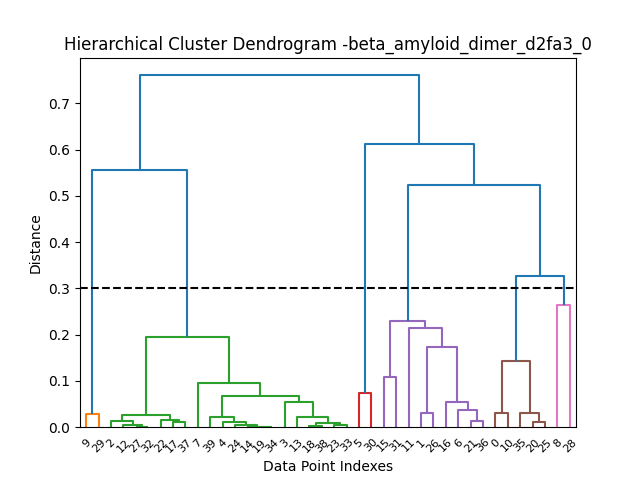

In [18]:
clustering.hierarchical(my_data.df, threshold=0.3, rmsd_scale=True)

## Multidimensional scaling representation

Multidimensional scaling (MDS) coordinates are computed from the distance matrix and added in the dataframe:

<Axes: xlabel='MDS 1', ylabel='MDS 2'>

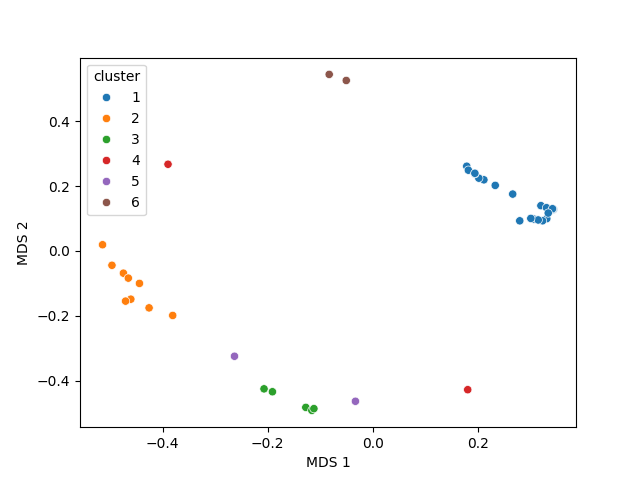

In [21]:
plt.figure()
sns.scatterplot(data=my_data.df, x='MDS 1', y='MDS 2', hue='cluster')